For the assignment we took three airbnb datasets off the internet. The locations include New York, Sydney, and Tokyo. All major hubs in the world, the importance for cheap fast housing has led to a plethora of homes on AirBnB.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)


Create the pandas read from the CSV for each file

In [27]:
nyDataset = pd.read_csv("AB_NYC_2019.csv")
nyDataset.head()

sydDataset = pd.read_csv("AB_SYD_2019.csv")
sydDataset.head()

tyoDataset = pd.read_csv("AB_TYO_2019.csv")
tyoDataset.head()

id                                               name  host_id  \
0   35303  La Casa Gaienmae C Harajuku, Omotesando is nearby   151977   
1  197677                          Oshiage Holiday Apartment   964081   
2  289597                  Private apt in central Tokyo #203   341577   
3  370759  Cozy flat #203, local area YET 10 mins to shib...  1573631   
4  700253                  Private apt in central Tokyo #201   341577   

             host_name  neighbourhood_group neighbourhood  latitude  \
0               Miyuki                  NaN    Shibuya Ku  35.67152   
1      Yoshimi & Marek                  NaN     Sumida Ku  35.71721   
2             Hide&Kei                  NaN     Nerima Ku  35.74267   
3  Gilles,Mayumi,Taiki                  NaN   Setagaya Ku  35.66344   
4             Hide&Kei                  NaN     Nerima Ku  35.74264   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  139.71203     Private room   4196              28                 18   
1  139.82596  Entire home/apt  10975               3                156   
2  139.65810  Entire home/apt   4196              30                107   
3  139.65593  Entire home/apt   6994              29                 99   
4  139.65832  Entire home/apt   3981              30                101   

  last_review  reviews_per_month  
0   7/28/2018               0.20  
1   5/21/2019               1.65  
2   5/25/2019               1.25  
3    5/7/2019               1.55  
4    5/3/2019               1.24

Create specific dataframes keeping just the neighborhood and the price of the neigborhood. This trims down the rest of the dataset and focuses on the two columns we want to analyze in particular.

In [28]:
dfny = pd.DataFrame(nyDataset, columns = ['neighbourhood_group', 'price'])
ny_group = dfny.groupby('neighbourhood_group').mean()

dfsyd = pd.DataFrame(sydDataset, columns = ['neighbourhood', 'price'])
syd_group = dfsyd.groupby('neighbourhood').mean()

dftyo = pd.DataFrame(tyoDataset, columns = ['neighbourhood', 'price'])
tyo_group = dftyo.groupby('neighbourhood').mean()
tyo_group

price
neighbourhood                    
Adachi Ku             7664.186047
Akiruno Shi           4895.750000
Akishima Shi         19153.333333
Arakawa Ku           12136.605735
Bunkyo Ku            13656.984496
Chiyoda Ku           40924.348485
Chofu Shi             9821.090909
Chuo Ku              15312.107143
Edogawa Ku           11781.527363
Fuchu Shi            12132.250000
Fussa Shi             6004.200000
Hachijo Machi        10929.285714
Hachioji Shi         53410.972973
Hamura Shi            6241.000000
Higashikurume Shi     4250.000000
Higashimurayama Shi   6483.000000
Higashiyamato Shi     3013.000000
Hino Shi              3879.823529
Hinohara Mura        27492.500000
Inagi Shi             2744.000000
Itabashi Ku          12827.295359
Katsushika Ku        11909.939286
Kita Ku              11434.497696
Kodaira Shi           4895.875000
Koganei Shi           7263.000000
Kokubunji Shi         4818.000000
Komae Shi            14400.500000
Koto Ku              12116.453947
Kozushima Mura        9039.000000
Kunitachi Shi         3981.000000
Machida Shi           4756.875000
Meguro Ku            13705.047619
Minato Ku            15488.537205
Mitaka Shi           12581.076923
Miyake Mura          15010.500000
Musashimurayama Shi   3271.000000
Musashino Shi         8859.111111
Nakano Ku            17621.768966
Nerima Ku             6811.806452
Niijima Mura         10007.000000
Nishitokyo Shi        8636.368421
Ogasawara Mura        6904.333333
Okutama Machi        21412.666667
Ome Shi               6594.428571
Oshima Machi          8529.772727
Ota Ku               11029.538462
Setagaya Ku          11879.527869
Shibuya Ku           20269.765808
Shinagawa Ku         14235.041176
Shinjuku Ku          15822.026036
Suginami Ku          11359.658863
Sumida Ku            13567.588168
Tachikawa Shi         9307.333333
Taito Ku             15229.270659
Tama Shi              5676.000000
Toshima Ku           14426.180782

Create a plot based apon the price per each neighborhood. This is valuable information in a dataset for airbnb if you are looking for a specific price range.

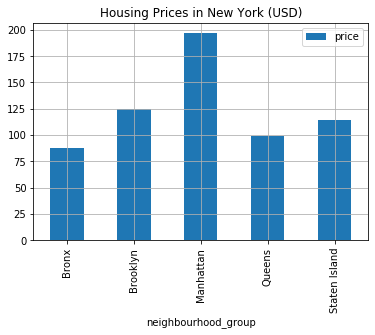

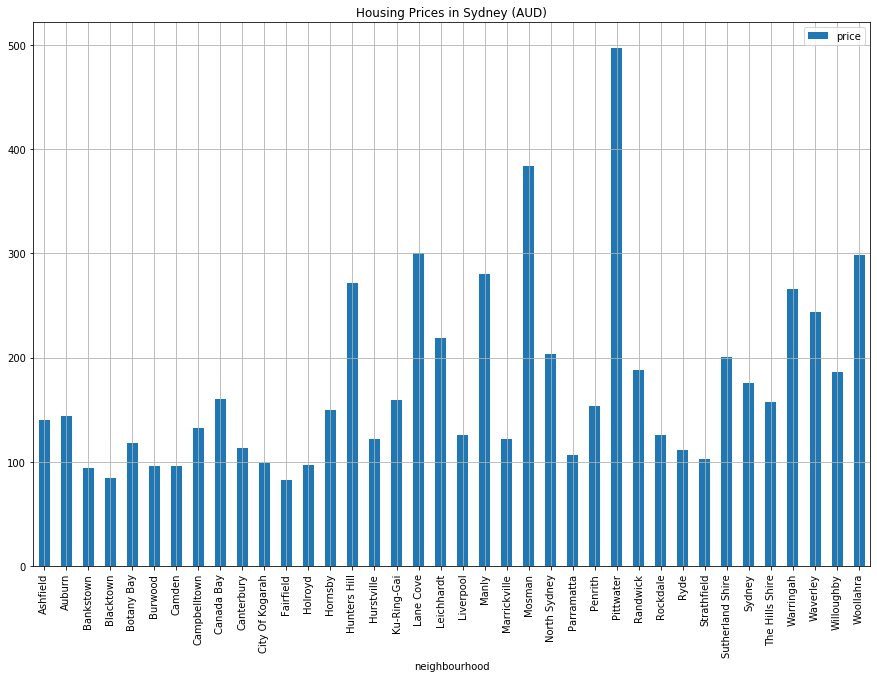

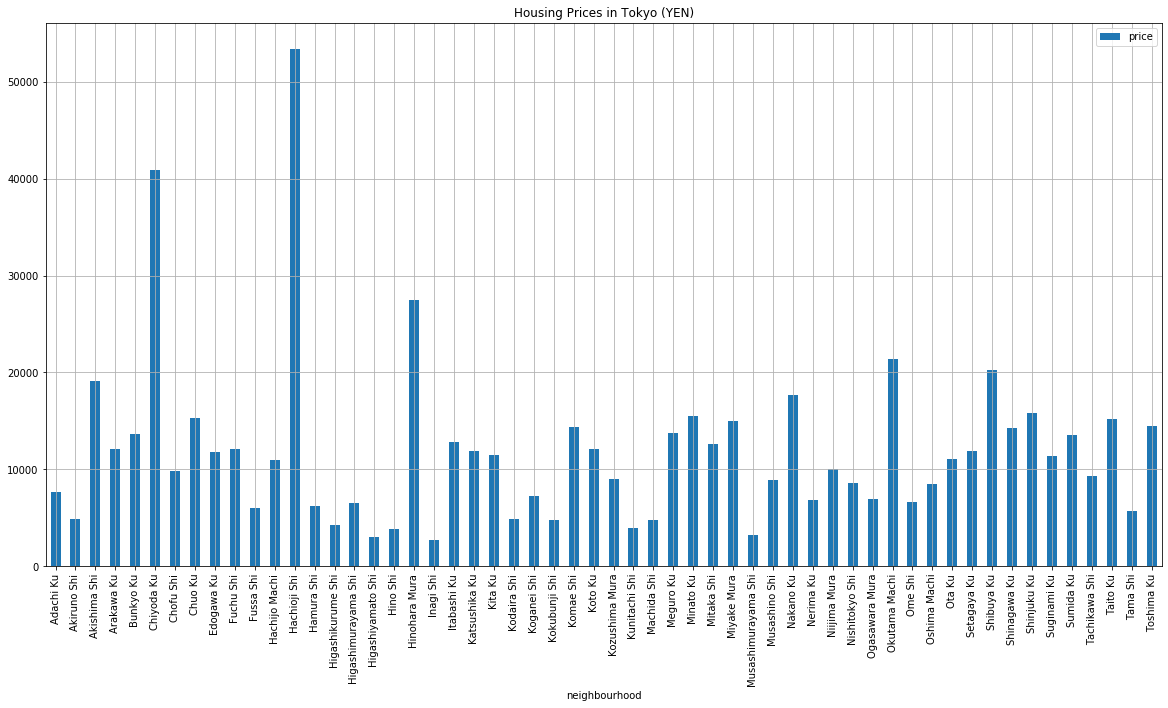

In [29]:
dfny.groupby('neighbourhood_group').mean().plot( y= 'price', kind = 'bar' ,title = "Housing Prices in New York (USD)", grid = True)
dfsyd.groupby('neighbourhood').mean().plot( y= 'price', kind = 'bar' ,title = "Housing Prices in Sydney (AUD)", figsize = (15,10), grid = True)
dftyo.groupby('neighbourhood').mean().plot( y= 'price', kind = 'bar', title = "Housing Prices in Tokyo (YEN)",figsize = (20,10), grid = True )

Create a single dataframe that concats all three datasets. Since there isn't any obvious relation between two. Instead we will create a dataset that just combines all three cities, so if comparisons what to be drawn the index can be set from where the datasets are from.

In [30]:
myFrames = [dfny,dftyo,dfsyd]
df_keys = pd.concat(myFrames, keys=['New York', 'Tokyo', 'Sydney'], sort=True)
df_keys

neighbourhood neighbourhood_group  price
New York 0               NaN            Brooklyn    149
         1               NaN           Manhattan    225
         2               NaN           Manhattan    150
         3               NaN            Brooklyn     89
         4               NaN           Manhattan     80
...                      ...                 ...    ...
Sydney   36657     Woollahra                 NaN    190
         36658    Canada Bay                 NaN    900
         36659   Strathfield                 NaN     46
         36660      Rockdale                 NaN    170
         36661        Sydney                 NaN     80

[97023 rows x 3 columns]

Sort the datasets by the value of the room_type

In [31]:
nyDataset.sort_values(by = 'room_type')
sydDataset.sort_values(by = 'room_type')
tyoDataset.sort_values(by = 'room_type')

id                                               name    host_id  \
5732  28418709  FF220 Downtown Yamanote House btw Ikebukuro & ...  214542628   
9184  32903845  Asakusa/Ueno/ 6min to Iriya sta./6ppl/WiFi#kin101  247554637   
5028  27353244  New!! Luxury Apartment Ikebukuro, 7min to Shin...  199874031   
5027  27350666      !!!Summer SALE!!!♪Ikebukuro Brilliant IK1-203  162218189   
5026  27349885  Free Wifi/Easy Access! 3min Kichijoji Stn #43(...   30451776   
...        ...                                                ...        ...   
6069  29016763        浅草寺まで8分/周辺ｺﾝﾋﾞﾆ､ｽｰﾊﾟｰ便利/wifi無料/屋上からｽｶｲﾂﾘｰ景色  218500469   
6068  29016548        浅草寺まで8分/wifi無料/周辺ｺﾝﾋﾞﾆ､ｽｰﾊﾟｰ便利/屋上からｽｶｲﾂﾘｰ景色  218500469   
6062  28999955  The perfect base to explore Tokyo!  Bottom bed"月"   70755252   
2175  20527711            ﾋﾛﾏｽﾎｽﾃﾙ in 神田 ﾄﾞﾐﾄﾘｰﾙｰﾑ 男性用 二段ﾍﾞｯﾄﾞ1名分  142756085   
6606  29641388      Mixed Dormitory♪Near Ginza/Tokyo/Tsukiji♪_TP2  223093998   

                    host_name  neighbourhood_group  neighbourhood  latitude  \
5732                   Midori                  NaN     Toshima Ku  35.73837   
9184                    Kaori                  NaN       Taito Ku  35.72023   
5028                     Chie                  NaN     Toshima Ku  35.72479   
5027                   Tosaya                  NaN     Toshima Ku  35.73800   
5026                    Emily                  NaN  Musashino Shi  35.70137   
...                       ...                  ...            ...       ...   
6069                        宿                  NaN       Taito Ku  35.71926   
6068                        宿                  NaN       Taito Ku  35.72111   
6062                    Yuuto                  NaN     Toshima Ku  35.72376   
2175  Hiromas Hostel In Kanda                  NaN     Chiyoda Ku  35.69238   
6606                DJ Hostel                  NaN        Chuo Ku  35.67246   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
5732  139.74682  Entire home/apt  40028               1                  6   
9184  139.78909  Entire home/apt  10007               2                  9   
5028  139.70912  Entire home/apt  12805               4                 29   
5027  139.71452  Entire home/apt  20014               1                 49   
5026  139.57823  Entire home/apt  12051               1                 42   
...         ...              ...    ...             ...                ...   
6069  139.79939      Shared room   3981               1                 22   
6068  139.79896      Shared room   6026               1                 17   
6062  139.68840      Shared room   2475               1                 15   
2175  139.77590      Shared room   2044               1                 51   
6606  139.77572      Shared room   4842               1                 12   

     last_review  reviews_per_month  
5732   2/10/2019               0.81  
9184   6/25/2019               3.25  
5028   5/17/2019               2.97  
5027   6/15/2019               4.61  
5026   6/21/2019               4.53  
...          ...                ...  
6069    6/1/2019               2.84  
6068   5/21/2019               2.06  
6062   5/27/2019               1.84  
2175   6/25/2019               2.54  
6606   6/10/2019               1.76  

[11466 rows x 14 columns]

Create DF for each different location, with just a roomtype of a shared room. Make sure that when comparing the room type prices you set the price column to one standard currency. In this case we chose USD.

In [32]:
tyoSharedRoom = tyoDataset[tyoDataset.room_type == 'Shared room']
tyoSharedRoom

tyoSharedRoom.loc[:,'price'] *= 0.0092
tyoSharedRoom

sydSharedRoom = sydDataset[sydDataset.room_type == 'Shared room']
sydSharedRoom

sydSharedRoom.loc[:,'price'] *= 0.69
sydSharedRoom

nySharedRoom = nyDataset[nyDataset.room_type == 'Shared room']
nySharedRoom

id                                             name    host_id  \
39        12048              LowerEastSide apt share shortterm 1       7549   
203       54453               MIDTOWN WEST - Large alcove studio     255583   
357       99070              Comfortable Cozy Space in El Barrio     522065   
492      173072                    Cozy Pre-War Harlem Apartment     826192   
545      200645                   Best Manhattan Studio Deal!        933378   
...         ...                                              ...        ...   
48832  36450814                         FLATBUSH HANG OUT AND GO  267223765   
48855  36456829                Perfectly Located Organic Getaway    6677425   
48867  36473044  The place you were dreaming for.(only for guys)  261338177   
48868  36473253                     Heaven for you(only for guy)  261338177   
48893  36485609             43rd St. Time Square-cozy single bed   30985759   

             host_name neighbourhood_group    neighbourhood  latitude  \
39                 Ben           Manhattan  Lower East Side  40.71401   
203               Anka           Manhattan   Hell's Kitchen  40.76548   
357    Liz And Melissa           Manhattan      East Harlem  40.79406   
492              Lewis           Manhattan           Harlem  40.80827   
545                Edo           Manhattan  Upper East Side  40.76739   
...                ...                 ...              ...       ...   
48832           Jarmel            Brooklyn         Flatbush  40.64922   
48855           Isabel           Manhattan  Upper West Side  40.79753   
48867            Diana            Brooklyn        Gravesend  40.59080   
48868            Diana            Brooklyn        Gravesend  40.59118   
48893              Taz           Manhattan   Hell's Kitchen  40.75751   

       longitude    room_type  price  minimum_nights  number_of_reviews  \
39     -73.98917  Shared room     40               1                214   
203    -73.98474  Shared room    105               6                 10   
357    -73.94102  Shared room     65               7                131   
492    -73.95329  Shared room     49               3                168   
545    -73.95570  Shared room     90               1                  0   
...          ...          ...    ...             ...                ...   
48832  -73.96078  Shared room     20               1                  0   
48855  -73.96155  Shared room     55               2                  0   
48867  -73.97116  Shared room     25               1                  0   
48868  -73.97119  Shared room     25               7                  0   
48893  -73.99112  Shared room     55               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
39       7/5/2019               1.81                               4   
203      1/7/2014               0.09                               1   
357     5/26/2019               1.31                               2   
492      7/6/2019               4.60                               1   
545           NaN                NaN                               1   
...           ...                ...                             ...   
48832         NaN                NaN                               3   
48855         NaN                NaN                               2   
48867         NaN                NaN                               6   
48868         NaN                NaN                               6   
48893         NaN                NaN                               6   

       availability_365  
39                  188  
203                 363  
357                   0  
492                 248  
545                   0  
...                 ...  
48832               363  
48855                49  
48867               338  
48868               365  
48893                 2  

[1160 rows x 16 columns]

Find the average price of each of the dataframes only containing AirBnB's that are shared rooms. After doing this, create a plot displaying each of the different locations

Text(0.5, 1.0, 'Shared Room Prices')

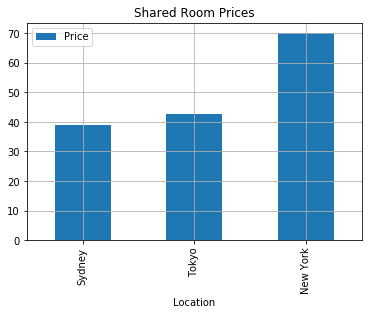

In [33]:
dfSharedsyd = pd.DataFrame(sydSharedRoom, columns = ['neighbourhood', 'name', 'price'])
dfSharedtyo = pd.DataFrame(tyoSharedRoom, columns = ['neighbourhood', 'name', 'price'])
dfSharedny = pd.DataFrame(nySharedRoom, columns = ['neighbourhood', 'name', 'price'])

price= []
location = []
price.append(dfSharedsyd.price.mean())
location.append("Sydney")
price.append(dfSharedtyo.price.mean())
location.append("Tokyo")
price.append(dfSharedny.price.mean())
location.append("New York")

data = list(zip(location, price))  

dfShared = pd.DataFrame(data, columns = ['Location', 'Price']) 

dfShared.plot(y= 'Price', x = 'Location', kind = 'bar', grid = True)
plt.title("Shared Room Prices")

As shown in the table above. We can make some discoveries from the data that we obtained. The average prices in New York for a shared room type is 30 dollars more than both Sydney and Tokyo. We can draw some conclusions about the housing market prices for each of these living situations. From the data we obtained earlier, we concluded that the prices in Manhattan was a major proponent in high living expenses in New York.

Finally let's combine the datatset to establish more value from the data analysis. By creating this dataframe we can compare certain aspects in the housing datasets like neighbourhoods, and how the two compare to one another.

In [34]:
myFrames = [dfSharedsyd,dfSharedtyo,dfSharedny]
df_keys = pd.concat(myFrames, keys=['Sydney', 'Tokyo', 'New York'], sort=True)
df_keys

name  \
Sydney   240                 Maroubra Junction, Eastern Suburbs   
         1470               A humble apartment in a nice suburb   
         1579               affordable  rooms at prime location   
         1718                          cozy room in nice suburb   
         1782               Close to airport, beach and Novotel   
...                                                         ...   
New York 48832                         FLATBUSH HANG OUT AND GO   
         48855                Perfectly Located Organic Getaway   
         48867  The place you were dreaming for.(only for guys)   
         48868                     Heaven for you(only for guy)   
         48893             43rd St. Time Square-cozy single bed   

                  neighbourhood  price  
Sydney   240           Randwick  51.75  
         1470            Sydney  62.79  
         1579            Sydney  86.94  
         1718            Sydney  84.87  
         1782          Rockdale  82.80  
...                         ...    ...  
New York 48832         Flatbush  20.00  
         48855  Upper West Side  55.00  
         48867        Gravesend  25.00  
         48868        Gravesend  25.00  
         48893   Hell's Kitchen  55.00  

[2788 rows x 3 columns]

In [35]:
tyoDataset.loc[:,'price'] *= 0.0092
sydDataset.loc[:,'price'] *= 0.69

result = pd.merge(sydDataset, tyoDataset, on='price')
result

id_x                               name_x  host_id_x host_name_x  \
0       3085258          Room in amazing beach house    4857248   Alexandra   
1       3085258          Room in amazing beach house    4857248   Alexandra   
2       3085258          Room in amazing beach house    4857248   Alexandra   
3       3085258          Room in amazing beach house    4857248   Alexandra   
4       3085258          Room in amazing beach house    4857248   Alexandra   
...         ...                                  ...        ...         ...   
53575  25960573         3 60 Ewart Lane Dulwich Hill  195133398     Arsalan   
53576  26280069  Bohemian apartment in lively sydney   87817460       David   
53577  26280069  Bohemian apartment in lively sydney   87817460       David   
53578  26280069  Bohemian apartment in lively sydney   87817460       David   
53579  26280069  Bohemian apartment in lively sydney   87817460       David   

       neighbourhood_group_x neighbourhood_x  latitude_x  longitude_x  \
0                        NaN        Randwick  -33.935783   151.258090   
1                        NaN        Randwick  -33.935783   151.258090   
2                        NaN        Randwick  -33.935783   151.258090   
3                        NaN        Randwick  -33.935783   151.258090   
4                        NaN        Randwick  -33.935783   151.258090   
...                      ...             ...         ...          ...   
53575                    NaN    Marrickville  -33.910858   151.139156   
53576                    NaN          Sydney  -33.880877   151.215321   
53577                    NaN          Sydney  -33.880877   151.215321   
53578                    NaN          Sydney  -33.880877   151.215321   
53579                    NaN          Sydney  -33.880877   151.215321   

           room_type_x  price  ...  host_name_y  neighbourhood_group_y  \
0         Private room  22.77  ...        Hisao                    NaN   
1         Private room  22.77  ...        Hisao                    NaN   
2         Private room  22.77  ...        Hisao                    NaN   
3         Private room  22.77  ...     Masanori                    NaN   
4         Private room  22.77  ...       Noboru                    NaN   
...                ...    ...  ...          ...                    ...   
53575  Entire home/apt   0.00  ...       Makoto                    NaN   
53576     Private room   0.00  ...       Rickie                    NaN   
53577     Private room   0.00  ...       Makoto                    NaN   
53578     Private room   0.00  ...       Makoto                    NaN   
53579     Private room   0.00  ...       Makoto                    NaN   

      neighbourhood_y  latitude_y  longitude_y      room_type_y  \
0            Taito Ku    35.72576    139.78170  Entire home/apt   
1          Arakawa Ku    35.72730    139.78158  Entire home/apt   
2          Arakawa Ku    35.72761    139.78153  Entire home/apt   
3          Edogawa Ku    35.67196    139.86629     Private room   
4         Shinjuku Ku    35.69974    139.72389     Private room   
...               ...         ...          ...              ...   
53575       Sumida Ku    35.70534    139.79748     Private room   
53576        Hino Shi    35.66414    139.40825  Entire home/apt   
53577       Sumida Ku    35.70372    139.79744     Private room   
53578       Sumida Ku    35.70550    139.79741     Private room   
53579       Sumida Ku    35.70534    139.79748     Private room   

       minimum_nights_y number_of_reviews_y  last_review_y reviews_per_month_y  
0                     1                 246      6/24/2019                5.24  
1                     1                 213      6/14/2019                4.70  
2                     1                 207      6/24/2019                4.83  
3                     4                  97       6/4/2019                2.28  
4                     3                  51      6/26/2019                1.40  
...  

From the merged datasets we can see what properties share the same price. So we can get a prime example of what a property in Tokyo might get us and Sydney might get us at a certain price point. 
